# ECE C247 - Neural Networks & Deep Learning
# EEG Dataset

# Group Members
### Anirudh Krishna 
### Swagath Babu 
### Jacob Thomas


# Load the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Defining the Parameters

In [3]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

### We tried different values for the Learning Rate and for the Decay. However, the values defined below are considered the best in order to obtain good performance. 

# Data Setup

In [4]:
data_path = "/content/drive/My Drive/Dataset/C247/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[5], verbose=True)

Training/Valid data shape: (235, 22, 1000)
Test data shape: (47, 22, 1000)


## Preprocessing

In [5]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Loading

In [6]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Comparing different models for Subject 5 and giving a comparative perspective

### The model architecture can be found in the models.py file

## CNN

In [7]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.44375
	Train loss: 0.04417, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02975, Accuracy: 11/47 (23.40%)
	Test loss: 0.02999, Accuracy: 10/47 (21.28%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.54871
	Train loss: 0.04411, Accuracy: 50/188 (26.60%)
	Validation loss: 0.02997, Accuracy: 11/47 (23.40%)
	Test loss: 0.03043, Accuracy: 8/47 (17.02%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.29333
	Train loss: 0.04385, Accuracy: 53/188 (28.19%)
	Validation loss: 0.03033, Accuracy: 8/47 (17.02%)
	Test loss: 0.03048, Accuracy: 9/47 (19.15%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.39660
	Train loss: 0.04350, Accuracy: 57/188 (30.32%)
	Validation loss: 0.03065, Accuracy: 8/47 (17.02%)
	Test loss: 0.03044, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.42170
	Train loss: 0.04359, Accuracy: 60/188 (31.91%)
	Validation loss: 0.03049, Accuracy: 11/47 (23.40%)
	Test loss: 0.03053, 

Best validation accuracy:
0.2553

Best test accuracy:
0.3830

## Plotting Metrics v/s Number of Epochs: 
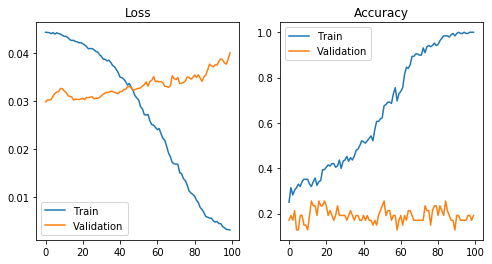

## LSTM

In [8]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.45010
	Train loss: 0.04424, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02970, Accuracy: 10/47 (21.28%)
	Test loss: 0.02973, Accuracy: 8/47 (17.02%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.41295
	Train loss: 0.04414, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02986, Accuracy: 10/47 (21.28%)
	Test loss: 0.02975, Accuracy: 8/47 (17.02%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.35547
	Train loss: 0.04410, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02980, Accuracy: 9/47 (19.15%)
	Test loss: 0.02970, Accuracy: 8/47 (17.02%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.28979
	Train loss: 0.04386, Accuracy: 64/188 (34.04%)
	Validation loss: 0.02963, Accuracy: 11/47 (23.40%)
	Test loss: 0.02972, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.35317
	Train loss: 0.04351, Accuracy: 66/188 (35.11%)
	Validation loss: 0.02956, Accuracy: 15/47 (31.91%)
	Test loss: 0.02966, 

Best validation accuracy:
0.32

Best test accuracy:
0.3404

## Plotting Metrics v/s Number of Epochs: 
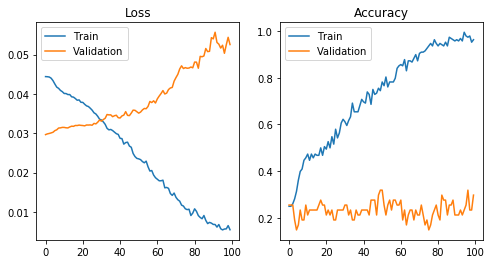

## CNN + LSTM

In [9]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.37608
	Train loss: 0.04414, Accuracy: 53/188 (28.19%)
	Validation loss: 0.02975, Accuracy: 7/47 (14.89%)
	Test loss: 0.02979, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.37224
	Train loss: 0.04413, Accuracy: 53/188 (28.19%)
	Validation loss: 0.02981, Accuracy: 7/47 (14.89%)
	Test loss: 0.02981, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.37163
	Train loss: 0.04411, Accuracy: 53/188 (28.19%)
	Validation loss: 0.02986, Accuracy: 7/47 (14.89%)
	Test loss: 0.02983, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.36978
	Train loss: 0.04411, Accuracy: 53/188 (28.19%)
	Validation loss: 0.02989, Accuracy: 7/47 (14.89%)
	Test loss: 0.02985, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.36999
	Train loss: 0.04410, Accuracy: 53/188 (28.19%)
	Validation loss: 0.02992, Accuracy: 7/47 (14.89%)
	Test loss: 0.02987, A

Best validation accuracy:
0.3803

Best test accuracy:
0.3809

## Plotting Metrics v/s Number of Epochs: 
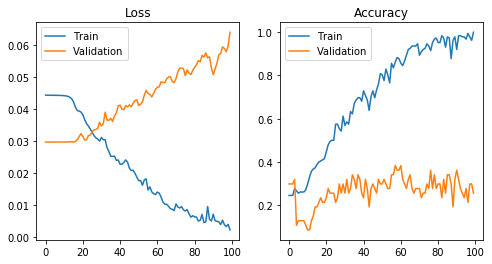

## GRU

In [10]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.46441
	Train loss: 0.04416, Accuracy: 51/188 (27.13%)
	Validation loss: 0.03014, Accuracy: 10/47 (21.28%)
	Test loss: 0.02994, Accuracy: 8/47 (17.02%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.44849
	Train loss: 0.04394, Accuracy: 54/188 (28.72%)
	Validation loss: 0.03029, Accuracy: 11/47 (23.40%)
	Test loss: 0.03002, Accuracy: 8/47 (17.02%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.36808
	Train loss: 0.04340, Accuracy: 59/188 (31.38%)
	Validation loss: 0.03061, Accuracy: 11/47 (23.40%)
	Test loss: 0.03021, Accuracy: 6/47 (12.77%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.33812
	Train loss: 0.04296, Accuracy: 63/188 (33.51%)
	Validation loss: 0.03092, Accuracy: 9/47 (19.15%)
	Test loss: 0.03043, Accuracy: 7/47 (14.89%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.30701
	Train loss: 0.04256, Accuracy: 77/188 (40.96%)
	Validation loss: 0.03088, Accuracy: 10/47 (21.28%)
	Test loss: 0.03033, A

Best validation accuracy:
0.340455

Best test accuracy:
0.3128

## Plotting Metrics v/s Number of Epochs:
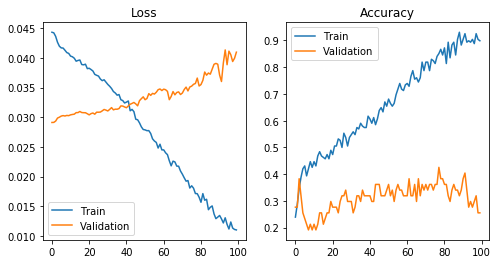

## CNN + GRU

In [11]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.38655
	Train loss: 0.04440, Accuracy: 53/188 (28.19%)
	Validation loss: 0.02970, Accuracy: 7/47 (14.89%)
	Test loss: 0.02922, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.37871
	Train loss: 0.04421, Accuracy: 53/188 (28.19%)
	Validation loss: 0.02972, Accuracy: 7/47 (14.89%)
	Test loss: 0.02949, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.37712
	Train loss: 0.04413, Accuracy: 53/188 (28.19%)
	Validation loss: 0.02978, Accuracy: 7/47 (14.89%)
	Test loss: 0.02972, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.37334
	Train loss: 0.04410, Accuracy: 53/188 (28.19%)
	Validation loss: 0.02986, Accuracy: 7/47 (14.89%)
	Test loss: 0.02981, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.37456
	Train loss: 0.04404, Accuracy: 53/188 (28.19%)
	Validation loss: 0.02993, Accuracy: 7/47 (14.89%)
	Test loss: 0.02985, A

Best validation accuracy:
0.3191

Best test accuracy:
0.4043

## Plotting Metrics v/s Number of Epochs: 
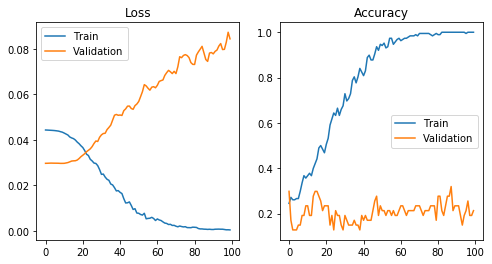